# Venkatesh Gudikoti

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from  statsmodels.tsa.arima.model import ARIMA
from  sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
df = pd.read_csv("Fitness_Classes_Cleaned_Preprocessed.csv")

df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_", regex=False)
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
)



In [19]:
df["Class_date"]= pd.to_datetime(
    df["bookingenddatetime_month_/_day_/_year"],
    errors="coerce"

)

df["attendance"] = df["number_booked"]

daily_demand = df.groupby("Class_date")["attendance"].sum()

print("Daily demand sample:")
print(daily_demand.head())


Daily demand sample:
Class_date
2018-04-01    223
2018-04-02    296
2018-04-03    973
2018-04-04    905
2018-04-05    695
Name: attendance, dtype: int64


# Train ARIMA Model

In [25]:
from statsmodels.tsa.arima.model import ARIMA

daily_demand = daily_demand.asfreq("D")

model = ARIMA(daily_demand, order=(1,1,1))
model_fit = model.fit()

print("\nARIMA Model summary:")
print(model_fit.summary())


ARIMA Model summary:
                               SARIMAX Results                                
Dep. Variable:             attendance   No. Observations:                   91
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -616.664
Date:                Tue, 16 Dec 2025   AIC                           1239.329
Time:                        15:01:58   BIC                           1246.828
Sample:                    04-01-2018   HQIC                          1242.353
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4591      0.126      3.640      0.000       0.212       0.706
ma.L1         -0.9984      1.249     -0.799      0.424      -3.447       1.450
sigma2      5.035e+04   6.13e+

# Forecast Demand

In [26]:
forecast = model_fit.forecast(steps=7)
print(forecast)

2018-07-01    467.533723
2018-07-02    544.913252
2018-07-03    580.440809
2018-07-04    596.752711
2018-07-05    604.242057
2018-07-06    607.680668
2018-07-07    609.259451
Freq: D, Name: predicted_mean, dtype: float64


# Plot Actual vs Forecast

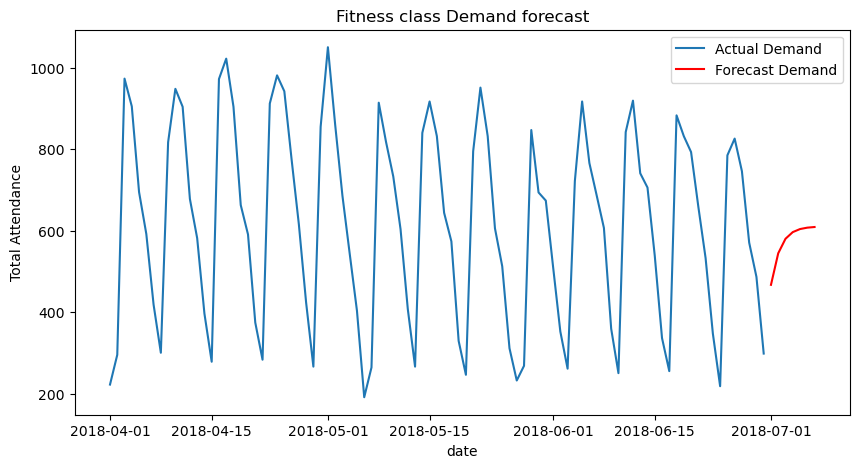

In [30]:
plt.figure(figsize=(10,5))
plt.plot(daily_demand, label="Actual Demand")
plt.plot(forecast, label="Forecast Demand", color = "red")
plt.title("Fitness class Demand forecast")
plt.xlabel("date")
plt.ylabel("Total Attendance")
plt.legend()
plt.show()

# Model Evaluation 

In [35]:
actual_last_7 = daily_demand[-7:]

mae = mean_absolute_error(actual_last_7, forecast)
mse = mean_squared_error(actual_last_7, forecast)

print("\nModel evaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)



Model evaluation Metrics:
MAE: 192.51558966163142
MSE: 44844.930422679136
